# CPS 840 / CP 8318
# Assignment 1 - Tolaz Hewa - 500590503
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [369]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


BIAS: 152.97455651267677
WEIGHTS: [840.920691033662]
Mean Squared Error: 3976.4676461772506
Variance score: 0.47257544798116635


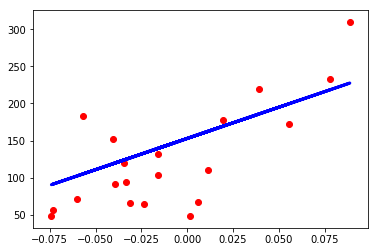

In [382]:
class linear_regression(object):
    def __init__(self,training_input, training_output, learning_rate = 0.1, iterations = 10000, threshold = 0.01):
        self.training_input = training_input
        self.training_output = training_output
        self.iterations = iterations
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.bias = 0.0
        self.weights = []
        self.weights += [1.0] * len(training_input[0])
        self.training_pred = []
        self.calculate_training_pred()
        
    def dot(self, a, b):
        res = 0
        for i in range(len(a)):
            res += a[i]*b[i]
        return res
    
    def get_prediction(self, input_list):
        return self.bias + self.dot(self.weights,input_list)
    
    def get_mean_squared_error(self):
        res = 0.0
        for i in range(len(self.training_input)):
            res += (self.get_prediction(self.training_input[i]) - self.training_output[i])**2
        res = res / len(self.training_input)
        return res
    
    def get_change_for_weight(self, weight_index):
        res = 0.0
        for i in range(len(self.training_input)):
                res += (self.get_prediction(self.training_input[i]) - self.training_output[i]) * self.training_input[i][weight_index]
        res = res / len(self.training_input)
        return res
    
    def get_change_for_bias(self):
        res = 0.0
        for i in range(len(self.training_input)):
            res += self.get_prediction(self.training_input[i]) - self.training_output[i]
        res = res / len(self.training_input)
        return res
        
    def calculate_training_pred(self):
        self.training_pred = []
        for val in self.training_input:
            self.training_pred += [self.get_prediction(val)]
        
    def train(self):
        for i in range(self.iterations):
            below_threshold = 0
            value = self.get_change_for_bias()
            
            if abs(value) < self.threshold:
                below_threshold += 1
            else:
                self.bias -= value * self.learning_rate
            
            for j in range(len(self.weights)):
                value = self.get_change_for_weight(j)
                if abs(value) < self.threshold:
                    below_threshold += 1
                else:
                    self.weights[j] -= value * self.learning_rate
            if below_threshold == len(self.weights) + 1:
                print("Met the threshold" + str(i))
                break
                
        self.calculate_training_pred()
    
    def get_training_predictions(self):
        return self.training_pred
    
    def get_predictions(self, inputs):
        res = []
        for elem in inputs:
            res += [self.get_prediction(elem)]
        return res
    
    def get_weights(self):
        return self.weights
    
    def get_bias(self):
        return self.bias

lr = linear_regression(diabetes_X_train, diabetes_y_train)
lr.train()

print("BIAS: " + str(lr.get_bias()))
print("WEIGHTS: " + str(lr.get_weights()))
print("Mean Squared Error: " + str(lr.get_mean_squared_error()))
print('Variance score: ' + str(r2_score(diabetes_y_test, diabetes_y_pred)))

diabetes_y_pred = lr.get_predictions(diabetes_X_test)

plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red')



            
        

[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation:


In [356]:
import pandas as pd 
import numpy as np
import math
from ast import literal_eval
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
ratings=pd.read_csv('ratings.csv')
keywords=pd.read_csv('keywords.csv')
credits=pd.read_csv('credits.csv')
links=pd.read_csv('links.csv')
links_small=pd.read_csv('links_small.csv')

[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>
i.  Explain your feature sets and organization. <br>

YOUR EXPLANATION HERE

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

YOUR EXPLANATION HERE

iii. Visualize any other relationships you deem interesting and explain. <br>

YOUR EXPLANATION HERE


In [357]:
# Create a new DataFrame to store relevant features
relevant_features = pd.DataFrame()
relevant_features['id'] = meta_data['id']
relevant_features['revenue'] = meta_data['revenue']
relevant_features = relevant_features.drop(relevant_features[relevant_features.revenue == 0].index)

# Months
relevant_features['month'] = pd.to_datetime(meta_data['release_date'], errors='coerce').dt.month
relevant_features['month'] = relevant_features['month'].fillna(0).astype(int)

# Genres
meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: ["genre_" + i['name'] for i in x] if isinstance(x, list) else [])
relevant_features = relevant_features.join(pd.DataFrame(mlb.fit_transform(meta_data['genres']),columns=mlb.classes_, index=meta_data.index))

# Original Languages
orig_lan = meta_data['original_language']
orig_lan = pd.get_dummies(orig_lan, prefix="lang", columns=['original_language'])
relevant_features = relevant_features.join(orig_lan)

# Budget
relevant_features['budget'] = meta_data['budget']
relevant_features = relevant_features.drop(relevant_features[relevant_features.budget == 0].index)

# Runtime
relevant_features['runtime'] = meta_data['runtime']
relevant_features = relevant_features.drop(relevant_features[relevant_features.runtime == 0].index)

# Ratings
ratings_average = ratings.groupby('movieId', as_index=False).rating.mean()
relevant_features = pd.merge(relevant_features, ratings_average, left_on='id', right_on='movieId', how='inner')

# Reorganize (sort) the features and take out id
relevant_features = relevant_features.reindex_axis(sorted(relevant_features.columns), axis=1)
relevant_features = relevant_features.drop("id",axis=1)
relevant_features = relevant_features.drop("movieId",axis=1)

# Get the target (true) outputs
target = pd.DataFrame()
target['revenue'] = relevant_features['revenue']
target_train = rf_true[:math.floor(len(target)*0.8)]
target_test = rf_true[math.floor(len(target)*0.8):]

# Remove the revenue from the dataset
relevant_features = relevant_features.drop("revenue",axis=1)

# Split the data into training data and test data
rf_train = relevant_features[:math.floor(len(relevant_features)*0.8)]
rf_test = relevant_features[math.floor(len(relevant_features)*0.8):]

Target Train: 1259
Target Test: 315
RF Train: 1259
RF Test: 315


[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

Coefficients: 
 [[ 2.35918969e+00 -3.23748960e+06  2.90005447e+07  5.36870514e+07
  -9.79872108e+06 -2.19189124e+07 -1.08131727e+07 -3.82462989e+07
   7.04546653e+07  5.89926497e+06  1.24052167e-06 -8.61615738e+07
  -6.75886972e+06 -6.75715094e+06  1.93851098e+06  9.66212081e+06
  -2.51969195e+07 -2.98023224e-08 -2.32397413e+07 -1.36484618e+07
  -7.46151232e+07 -5.96046448e-08  3.76272656e+07  7.45058060e-09
  -1.11758709e-08 -5.21540642e-08 -9.31322575e-09  7.45058060e-09
   1.07102096e-08  2.60770321e-08 -1.49011612e-08 -1.49011612e-08
  -7.45058060e-09 -3.72529030e-08  2.98023224e-08 -7.23335239e+07
  -1.74940445e+07  2.40533076e+07  1.14829849e+07  0.00000000e+00
   8.90204352e+06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.52078142e+07 -5.79729492e+06  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.18134188e+08  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.75773120e+07
   0.00000000e+00 -4.67600134e+07  0.00000000e+00  0.0000000

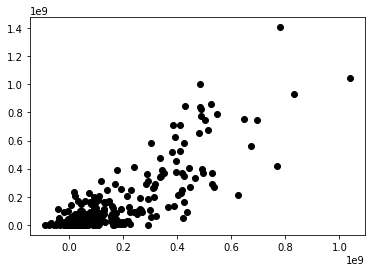

In [374]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(rf_train, target_train)

# Make predictions using the testing set
target_pred = regr.predict(rf_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target_test, target_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(target_test, target_pred))

# Plot outputs
#plt.scatter(rf_test.budget.values, target_test.revenue.values,  color='black')
#plt.plot(rf_test.budget.values, target_pred, color='blue', linewidth=3)

plt.scatter(target_pred, target_test.revenue.values,  color='black')

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

In [22]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######

In [23]:
##### YOUR CODE HERE WITH REGULARIZATION #######

## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

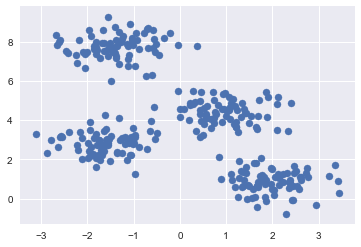

In [6]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

###############################################
# YOUR CODE GOES HERE
# Put some code to find clusters here
# Assign the clusters and labels in your code
###############################################




# Uncomment to display clusters and cluster centers
#plt.scatter(X[:, 0], X[:, 1], c=labels,
#            s=50, cmap='viridis');
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [7]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
mystery = np.load('mystery.npy')
mystery.shape

(30309, 784)

In [26]:
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.


Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

YOUR EXPLANATION HERE

(any additional code supporting your assertion on the number of clusters may be included below)

In [27]:
##### YOUR (OPTIONAL) CODE HERE #######

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

In [28]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

In [29]:
##### YOUR CODE HERE #######
